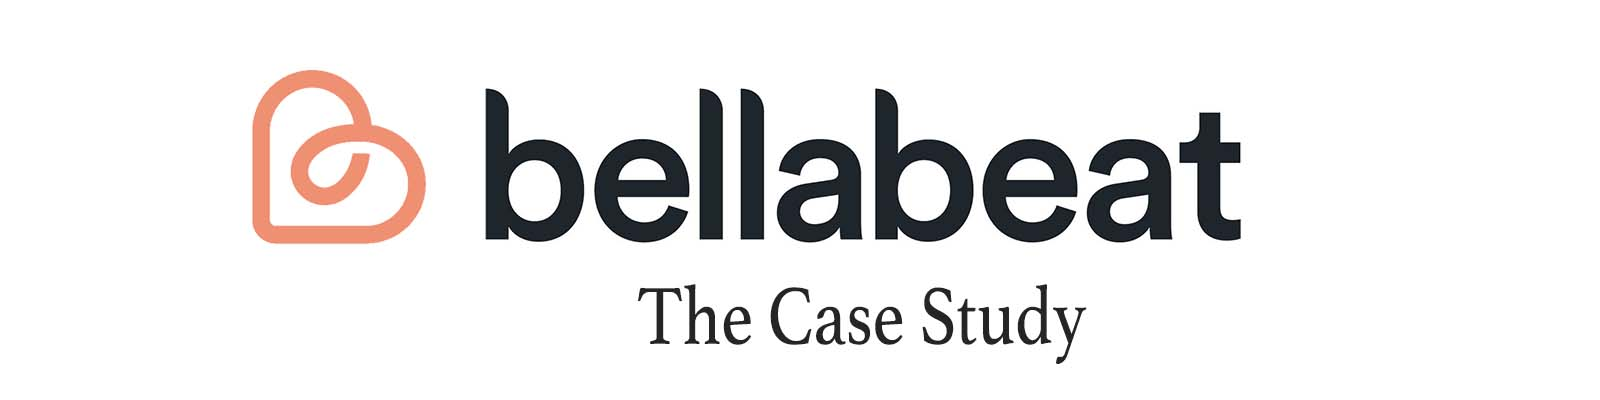

# <span style="color:teal;">Summary:
                              

Bellabeat is a wellness company that manufactures high tech, health-focused smart products. Founded by Urška Sršen and Sando Mur, Bellabeat uses beautifully designed technology to inspire women around the world to keep track of their health and wellness. Their products track this information by collecting data on daily activity, sleep habits, stress levels, and reproductive health.

Despite competition from the top smart-wearable manufactures, Bellabeat has carved a lane for itself, garnering a measurable amount of success and a strong bond with its consumers.

 <span style="color:teal;"> Business Task:
 -----------------------------------------

The focus of this case study is to gain insight into growth opportunities to help guide the marketing strategy for the company, Bellabeat, by analyzing the consumer usage of other smart devices on the market.

<span style="color:teal;">Primary Questions:
--------------------------------------------

* What are some trends in smart device usage? 
* How could these trends apply to Bellabeat customers? 
* How could these trends help influence Bellabeat marketing strategy? 

<span style="color:teal;">Stakeholders:
---------------------------------------
    
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Office
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

<span style="color:teal;">The Data: Preparing, and Processing for Analysis
--------------------------------------------------------------------------

The data source used for the case study is the [Fitbit Fitness Tracker](https://www.kaggle.com/arashnic/fitbit) Data, a dataset stored and made available by Mobius. The datasets were originally crowd-sourced and generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. It contains data from thirty fitbit users who consented to the submission of personal tracker data for physical activity, daily steps, heart rate, and sleep monitoring.

[Original Data Source](https://zenodo.org/record/53894#.YaZoTS1h10t)

<span style="color:teal;"> Process Phase:
-----------------------------------------

Due to the amount of data provided, the data will process my data in Python and create visualizations in Tableau to share findings with the Stakeholders.

The datasets that will be used to help solve the business task will be:
* daily_steps
* daily_activity
* daily_calories
* daily_sleep
* weigth_log     
* daily_intensities


First, I will import each dataset.

In [71]:
# Libraries/Packages needed to perform analysis

import pandas as pd
import numpy as np
import calendar

In [72]:
daily_activity =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
daily_steps =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
daily_calories =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_sleep =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
daily_intensities =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
weight_log =pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')


Then, the first five rows of each dataset were reviewed.

In [73]:
daily_activity.head(5)

In [74]:
daily_steps.head(5)

In [75]:
daily_calories.head(5)

In [76]:
daily_sleep.head(5)

In [77]:
daily_sleep.head(5)

In [78]:
daily_activity.head(5)

In [79]:
daily_intensities.head(5)

In [80]:
daily_activity.info()
daily_steps.info()
daily_calories.info()
daily_sleep.info()
daily_intensities.info()
weight_log.info()

#  <span style="color:teal;">Cleaning, Formatting, Organizing:
The number of participants was verified in each dataset. 

In [81]:
print(daily_activity['Id'].nunique())
print(daily_steps['Id'].nunique())
print(daily_calories['Id'].nunique())
print(daily_intensities['Id'].nunique())
print(daily_sleep['Id'].nunique())
print(weight_log['Id'].nunique())

After checking the total participants in each dataset, I discovered that some of the previous participants in the other dataset did not participate in the sleep monitoring study and a majority of participants did not track their weight.

Due to the dataset already being small and lacking demographical information, not having all participant's data for a portion of the study can create sampling biased. As a result, a different approach will be taken to analyze the data.

The columns in each dataset were re-named.

In [82]:
daily_sleep.rename(columns={'SleepDay': 'Date&Time', 'TotalSleepRecords':'Total_Sleep_Records','TotalMinutesAsleep':'Total_Min_Sleep','TotalTimeInBed':'Total_Sleep_Time'}, inplace=True)
daily_sleep

In [83]:
daily_steps.rename(columns={'ActivityDay':'Activity_Date','StepTotal':'Total_Steps'}, inplace=True)
daily_steps

In [84]:
daily_calories.rename(columns={'ActivityDay':'Activity_Date', 'Calories':'Total_Calories'},inplace=True)

In [85]:
weight_log.rename(columns={'WeightKg':'Weight_Kg', 'WeightPounds':'Weight_Lb','Fat':'Total_Fat','IsManualReport':'Is_Manual_Rpt','LogId':'Log_Id'},inplace=True)

In [86]:
daily_activity.rename(columns={'ActivityDate':'Activity_Date', 'TotalSteps':'Total_Steps', 'TotalDistance':'Total_Dist', 'TrackerDistance':'Tracker_Distance','LoggedActivitiesDistance':'Logged_Activ_Dist', 'VeryActiveDistance':'Very_Activ_Dist','ModeratelyActiveDistance':'Mod_Activ_Dist','LightActiveDistance':'Light_Activ_Dist','SedentaryActiveDistance':'Sedent_Activ_Dist', 'VeryActiveMinutes':'Very_Activ_Min','FairlyActiveMinutes':'Fairly_Activ_Min','LightlyActiveMinutes':'Lightly_Activ_Min','SedentaryMinutes':'Seden_Min','Calories':'Total_Calories'},inplace=True)

In [87]:
daily_intensities.rename(columns={'ActivityDate':'Activity_Date', 'SedentaryMinutes':'Sedentary_Min','LightlyActiveMinutes':'Lightly_Active_Min','FairlyActiveMinutes':'Fairly_Active_Min','VeryActiveMinutes':'Very_Active_Min','SedentaryActiveDistance':'Sedentary_Active_Dist','LightActiveDistance':'Light_Active_Dist','ModeratelyActiveDistance':'Moderately_Active_Dist','VeryActiveDistance':'Very_Active_Dist'},inplace=True)

# <span style="color:teal;">Merging Data
   
The concatenate function was used to combine various columns from each dataset into a new dataset. Then, all duplicate items were removed from the new dataset.

In [88]:
new_daily_activity= pd.concat([daily_steps, daily_activity['Total_Dist'], daily_intensities['Sedentary_Min'], daily_intensities['Very_Active_Min'],daily_intensities['Sedentary_Active_Dist'], daily_intensities['Very_Active_Dist'], daily_sleep['Total_Sleep_Time'], daily_calories['Total_Calories']], axis='columns', sort=False)
new_daily_activity = new_daily_activity.drop_duplicates()
new_daily_activity

# <span style="color:teal;">Analyze & Share Phase:

After merging datasets, the groupby function was used to consolidate the values in the dataset by the ID(participant) associated with it. Then, the ***mean*** function was used to generate the average value for each column associate with the participants ID.

In [89]:
Id_grp = new_daily_activity.groupby(['Id'])
Id_grp.mean()

Although the new datasets reflected the averages for each participant, I wanted to get information that reflected all of the participants as a whole. Comparing each participant would create a biased that doesn't reflect the business' task. To create a dataset that reflected those needs, another dataset was created consolidating the values by the 'Day' of the week. The ***mean*** function was used to generate the averages for each column by the day.

In [90]:
df=new_daily_activity
df['Activity_Date'] = pd.to_datetime(df['Activity_Date']) 
df['Day of Week Text'] = df['Activity_Date'].dt.day_name()
df.rename(columns={'Day of Week Text':'Day'},inplace=True)
df

In [91]:
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=day_list, ordered=True)
df = df.sort_values('Day')

In [92]:
week_day = df.groupby(['Day'])
daily_averages=week_day.mean()

In [93]:
daily_averages = daily_averages.drop(columns=['Id'])

The ***Id*** column was dropped because it was no longer needed. The column and row names were then reformatted to create a dataset that will be used for analyzation and visualization. A second dataset was created and formatted to reflect the sum total of each value. 

In [94]:
daily_averages.columns=[x.lower() for x in daily_averages.columns]
daily_averages.rename({'Monday':'Mon.','Tuesday':'Tue.','Wednesday':'Wed.', 'Thursday':'Thur.','Friday':'Fri.','Saturday':'Sat.', 'Sunday':'Sun.'},inplace=True)
daily_averages.rename(columns={'total_steps':'avg_steps','total_sleep_time': 'avg_sleep_time', 'total_dist':'avg_dist','total_calories':'avg_calories'},inplace=True)
daily_averages

In [95]:
daily_totals=week_day.sum()
daily_totals.columns=[x.lower() for x in daily_totals.columns]
daily_totals.rename({'Monday':'Mon.','Tuesday':'Tue.','Wednesday':'Wed.', 'Thursday':'Thur.','Friday':'Fri.','Saturday':'Sat.', 'Sunday':'Sun.'},inplace=True)
daily_totals = daily_totals.drop(columns=['id'])
daily_totals

The two datasets were then used to create visualizations for the analysis. The visualization tool used to create these charts was ***Tableau***.

1. **Daily Calories:**
*    Dataset Used: daily_averages
*    Chart Description: This chart shows the average calories(among participants) burned throughout the week.
   
2. **Daily Distance:**
*    Dataset Used: daily_averages
*    Chart Description: This chart shows the average distance traveled throughout the week.
   
3. **Daily Step:**
*    Dataset Used: daily_averages
*    Chart Description: This charts shows the average amount of steps taken throughout the week.
   
4. **Very Active Distance vs. Total Distance:**
*    Dataset Used: total_averages
*    Chart Description: This chart reflects the correlation between the distance traveled and the very active      distance throughout the week.
*    Reflection: The chart showed that there wasn't any correlation between distance traveled and very active distance. However, it did show that within the total distance of roughly 5.5 kilometers(3.41 miles), the participants were only active for the first 1.5 kilometers(0.93 miles).

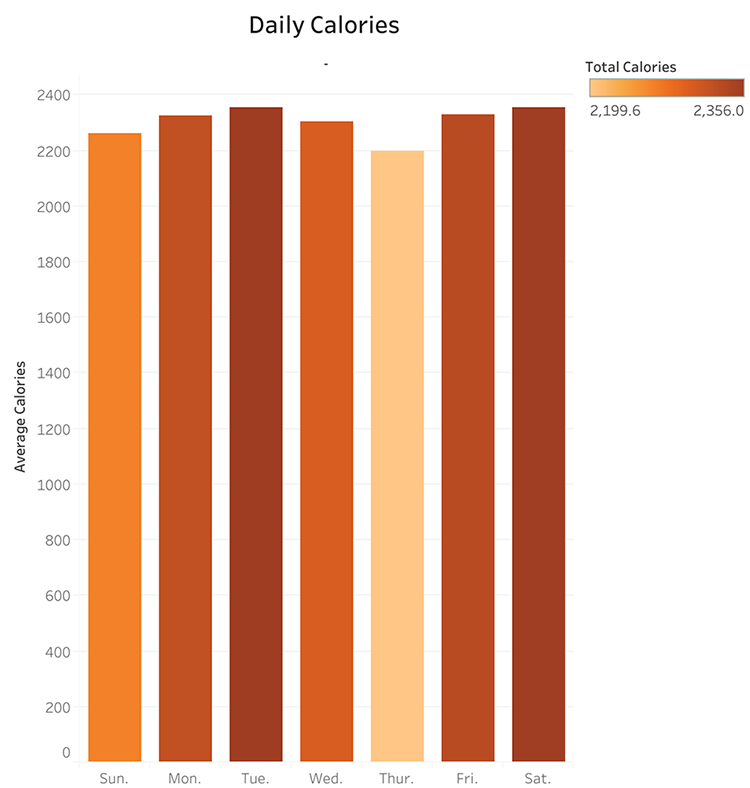

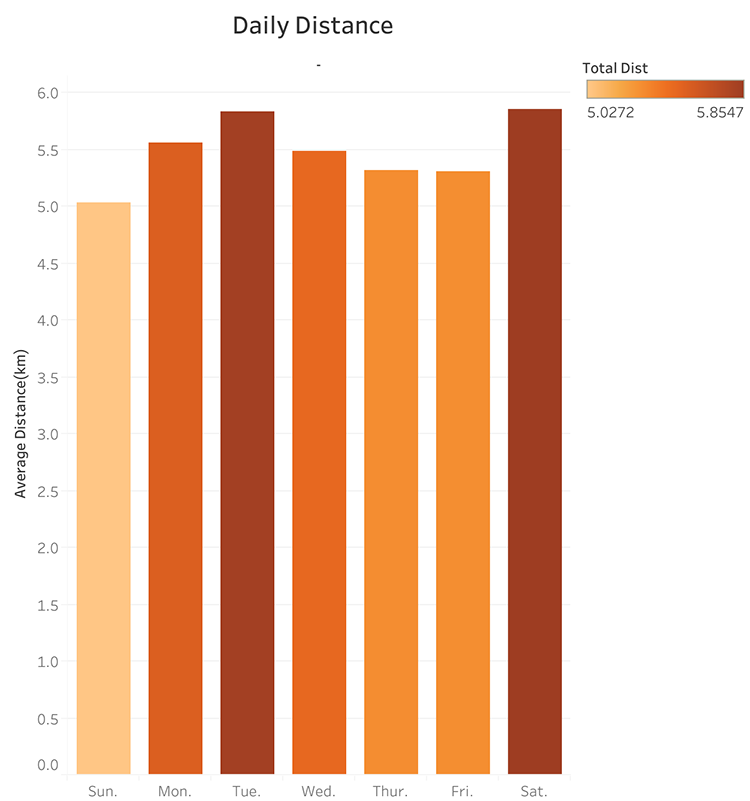

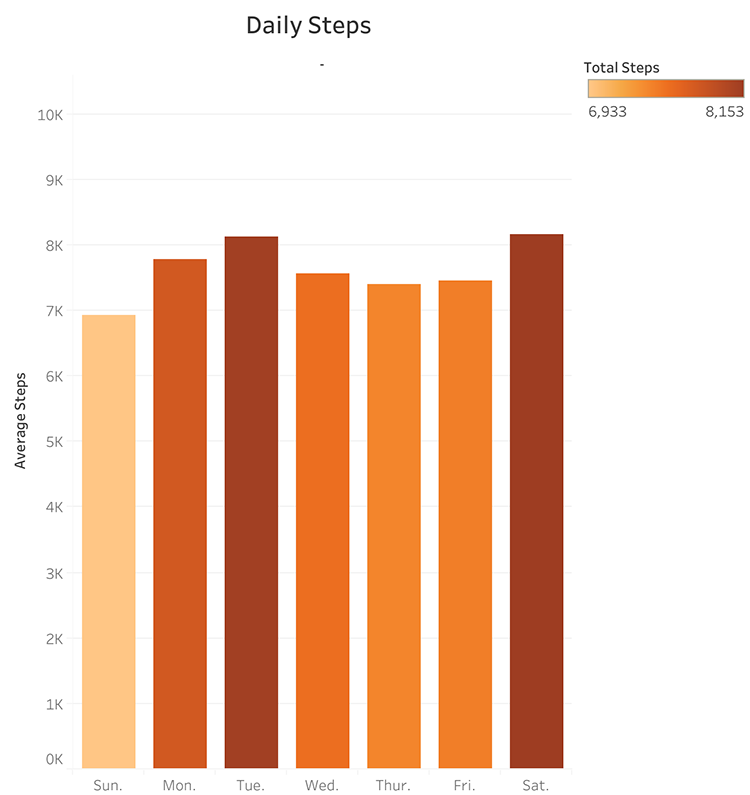

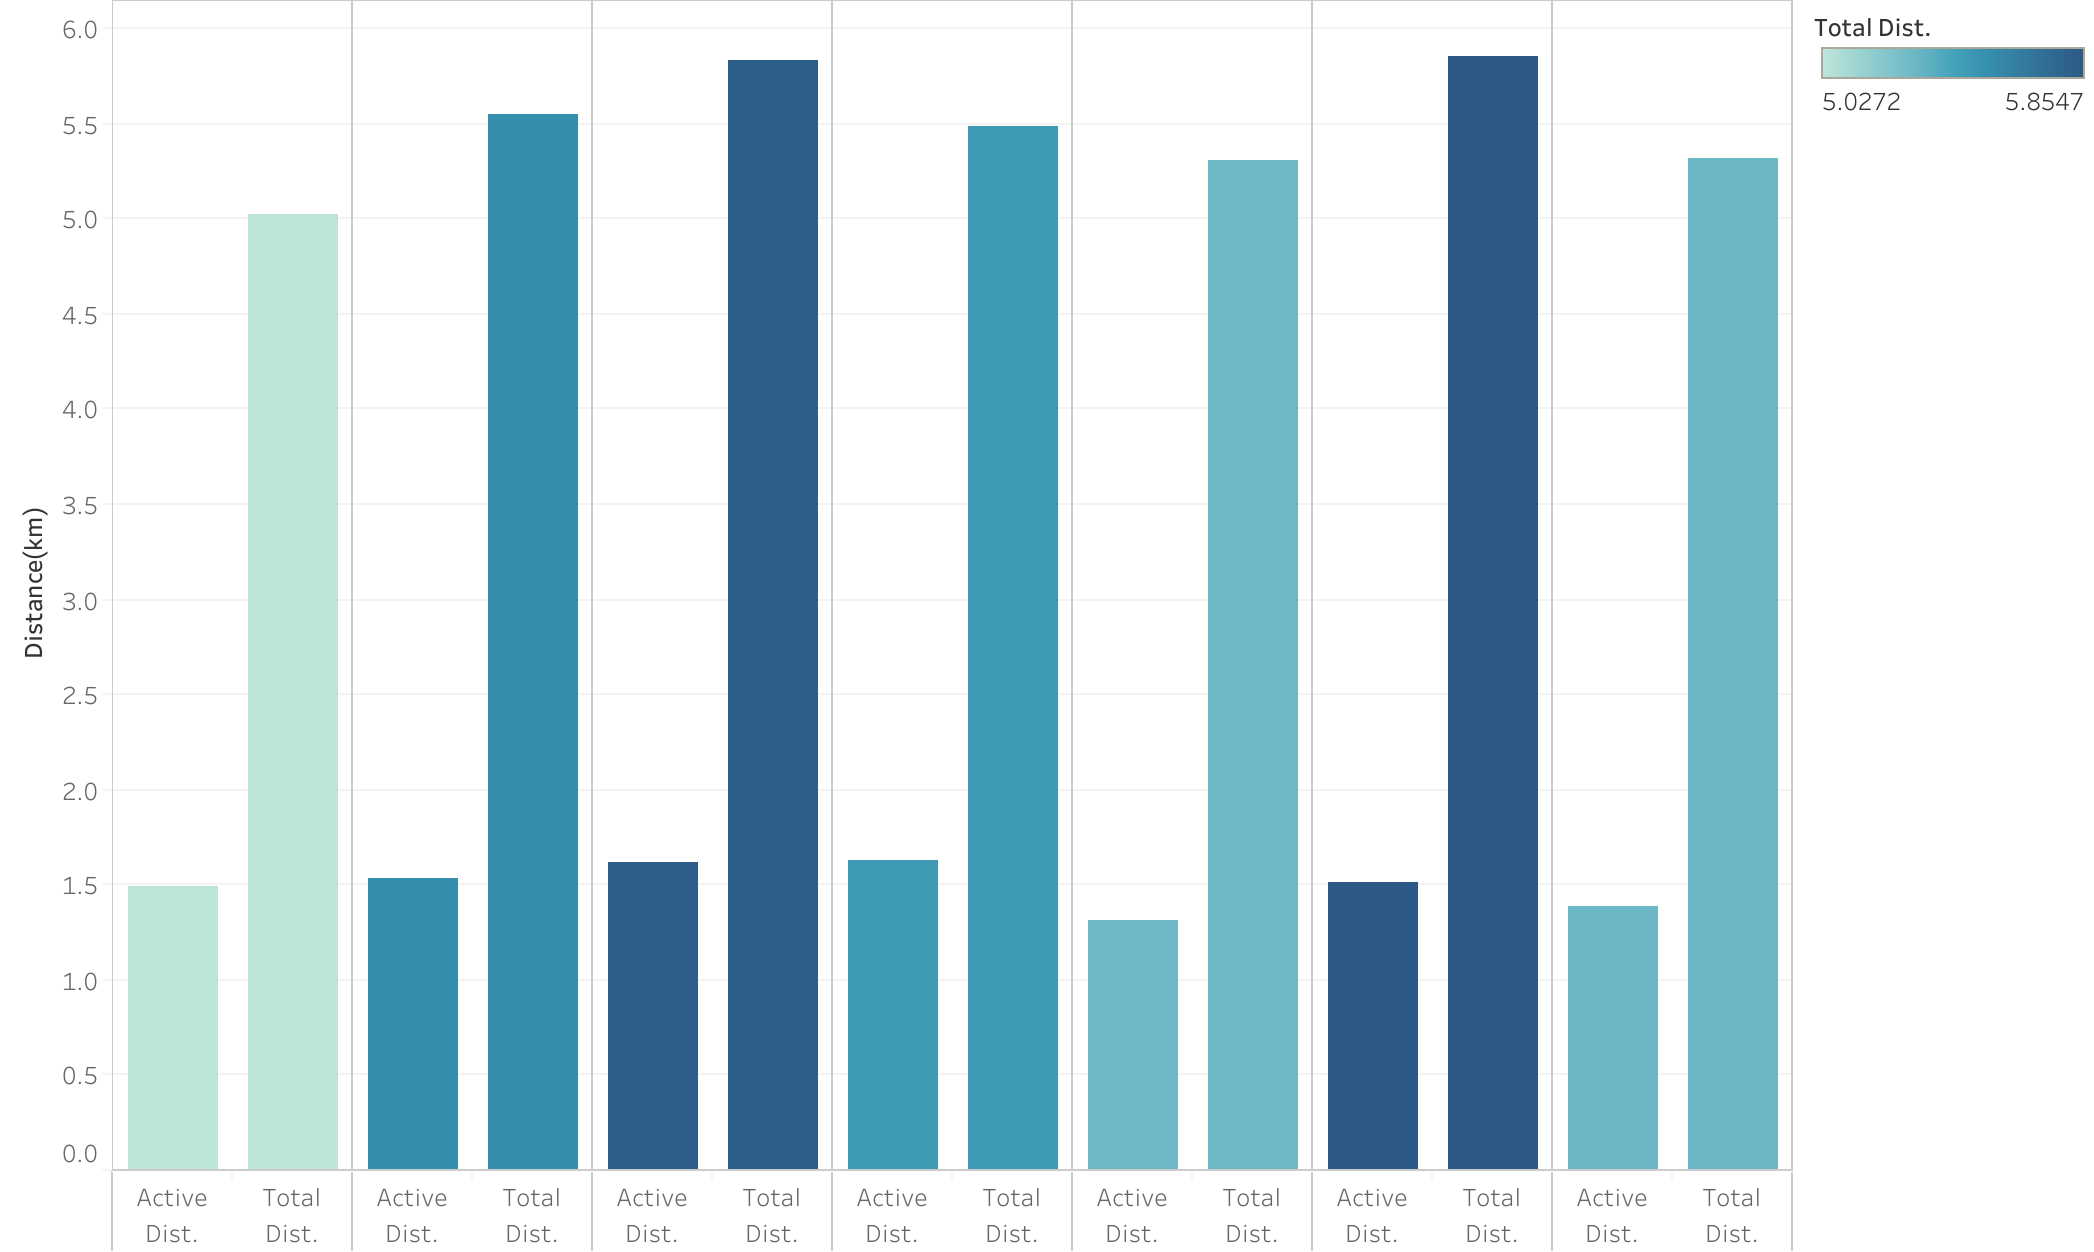

Two scatter plots were created using Python to reflect the correlation of two variables from each dataset.


In [96]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [97]:
plt.scatter(daily_averages['avg_calories'],daily_averages['avg_steps'],c='turquoise',edgecolor='black',linewidth=1,alpha=0.75,s=7)
plt.xlabel('Calories Burned')
plt.ylabel('Average Steps')

cbar=plt.colorbar()
cbar.set_label('Calories/Steps Ratio')
plt.tight_layout
plt.show()

**Average Calories vs. Average Steps**
* **Dataset Used:** daily_averages
* **Chart Desciption:** This chart show a correlation between the amount of calories burned versus the average amount of steps taken throughout the week.
* **Reflection:** There is a positive correlation between the two variables. The more steps each participant makes, the more calories they burned.

In [98]:
plt.scatter(daily_totals['total_sleep_time'],daily_totals['total_calories'],c='turquoise',cmap='summer',edgecolor='black',linewidth=1,alpha=0.75,s=7)
plt.xlabel('Total Sleep Time(Min)')
plt.ylabel('Calories Burned')

cbar=plt.colorbar()
cbar.set_label('Sleep Time/Calories')
plt.tight_layout
plt.show()

**Total Sleep Time vs. Total Calories Burned**
* **Dataset Used:** daily_totals
* **Chart Desciption:** This chart show a correlation between the total amount of sleep time versus the total amount of calories burned throughout the week.
* **Reflection:** There was not much correlation between sleep time and calories. The small amount of correlation could be due to other variables such as total steps or total distance. Total distance traveled can affect the number of calories burned, but may only affect the amount of sleep for a person who is just starting to actively exercise.

**Conclusion**

Bellabeat is a high-tech manufacturing company catered to the overall health of women. The purpose of this case study was to identify the trends of another smart device to help identify growth opportunities for Bellabeat. After analyzing the data, I noticed various patterns among the participant's data including, the level of activity, and the number of calories burned throughout the study. Another notable pattern included the amount of sleep each participant had throughout the 30 days. Although every participant did not submit their sleep time, I was able to find a general pattern for daily sleep and its correlation to other variables. 

Bellabeat can use these trends to provide more information to consumers and create incentives to make their consumers more engaged. During the study, a considerable number of participants did not log their weight or sleep time. This could be due to a lack of information on the importance of tracking them, and how they affect a person’s overall health. 

# <span style="color:teal;">Act Phase

* First Solution:Create a rewards program to encourage the consumers to be more active. The more active the consumer is, the higher the reward. This can also be a way to encourage consumers to use the app more. 

* Second Solution: Provide more information. More information can be provided through the app in the form of informational pop-ups that quickly describe the importance of various things such as sleep time and weight. Information can also, be provided with friendly reminders throughout the day.

* Third Solution: Create a community. A community forum can be created to get consumers to communicate, share ideas, and encourage each other. 

In conclusion, Bellabeat can create a rewards system that encourages consumers to be more active, track their data, use the app, which will help them receive more information, and become a part of a community where they can share their progress with others.



